# Dados aluno:

Nome: Bruno Raphaell Alves de Matos

Matrícula: 20179142830

# Fuzzificação

In [1]:
# Fazendo a importação das bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings

warnings.filterwarnings('ignore')  # Ignora os avisos de warnings

## Definindo as variáveis de entrada do problema.

Text(0.5, 1.0, 'Renda')

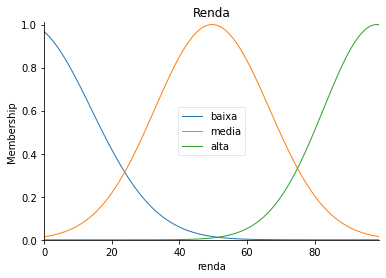

In [2]:
# 1. Renda:
renda = ctrl.Antecedent(np.arange(0, 100, 1), 'renda')

renda['baixa'] = fuzz.gaussmf(renda.universe, -4.91, 18.9)  
renda['media'] = fuzz.gaussmf(renda.universe, 49.7, 17)
renda['alta'] = fuzz.gaussmf(renda.universe, 98.4, 15.8)
renda.view()
plt.title('Renda')


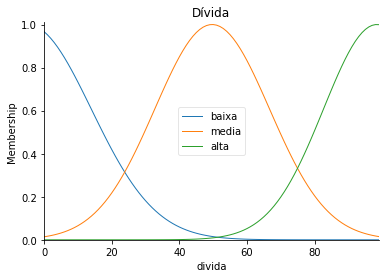

In [3]:
# 2. Dívida:
divida = ctrl.Antecedent(np.arange(0, 100, 1), 'divida')

divida['baixa'] = fuzz.gaussmf(divida.universe, -4.91, 18.9)  
divida['media'] = fuzz.gaussmf(divida.universe, 49.7, 17)
divida['alta'] = fuzz.gaussmf(divida.universe, 98.4, 15.8)

divida.view()
plt.title('Dívida')
plt.show()

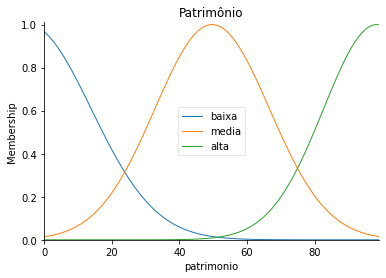

In [4]:
# 3. Patrimônio:
patrimonio = ctrl.Antecedent(np.arange(0, 100, 1), 'patrimonio')

patrimonio['baixa'] = fuzz.gaussmf(patrimonio.universe, -4.91, 18.9)  
patrimonio['media'] = fuzz.gaussmf(patrimonio.universe, 49.7, 17)
patrimonio['alta'] = fuzz.gaussmf(patrimonio.universe, 98.4, 15.8)

patrimonio.view()
plt.title('Patrimônio')
plt.show()

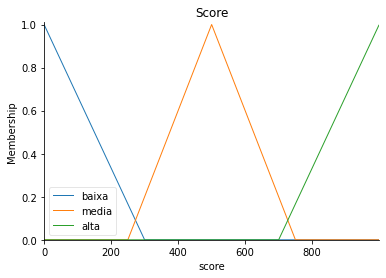

In [5]:
# Definindo a função de pertinência de saída Score:

score = ctrl.Consequent(np.arange(0, 1000, 1), 'score')

score['baixa'] = fuzz.trimf(score.universe, [0, 0, 300])  
score['media'] = fuzz.trimf(score.universe, [250, 500, 750])
score['alta'] = fuzz.trimf(score.universe, [700, 1000, 1000])

score.view()
plt.title('Score')
plt.show()


# Inferência

min -> And

Max -> OR

## Regras: 

In [6]:
regra1 = ctrl.Rule(renda['alta'] & divida['baixa'], score['alta'])
regra2 = ctrl.Rule(renda['baixa'] & divida['alta'], score['baixa'])
regra3 = ctrl.Rule(renda['media'] & divida['media'], score['media'])
regra4 = ctrl.Rule(patrimonio['alta'] & divida['baixa'], score['alta'])
regra5 = ctrl.Rule(patrimonio['baixa'] & divida['alta'], score['baixa'])
regra6 = ctrl.Rule(patrimonio['media'] & divida['media'], score['media'])
regra7 = ctrl.Rule(renda['alta'] & patrimonio['alta'], score['alta'])
regra8 = ctrl.Rule(renda['baixa'] & patrimonio['baixa'], score['baixa'])
regra9 = ctrl.Rule(renda['media'] & patrimonio['media'], score['media'])

# Desfuzzificação

In [7]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [8]:
# Função para desfuzzificação:

def desfuzzificação(sistema, renda, divida, patrimonio):
    sistema.input['renda'] = renda
    sistema.input['divida'] = divida
    sistema.input['patrimonio'] = patrimonio

    sistema.compute()

    print(f"Score: {sistema.output['score']:.2f}")

    labels = ['Baixo', 'Médio', 'Alto', 'Centroid']

    score.view(sim=sistema)
    plt.title('Score')
    plt.grid(color='green', linestyle = '--', linewidth = 0.5)
    plt.legend(labels, bbox_to_anchor=(0,-0.3,1,0.2), loc='lower center', mode='expand', ncol=4)
    plt.show()

## Teste 1:

- Renda = 70
- Dívida = 10
- Patrimônio = 90

Score: 821.76


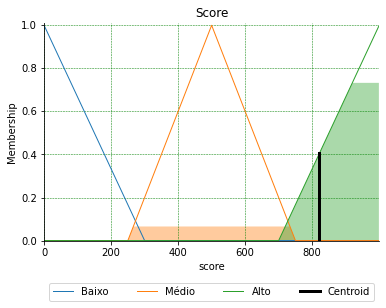

In [12]:
desfuzzificação(sistema, renda = 70, divida = 10, patrimonio = 90)

## Teste 2:

- Renda = 30
- Dívida = 60
- Patrimônio = 40

Score: 478.43


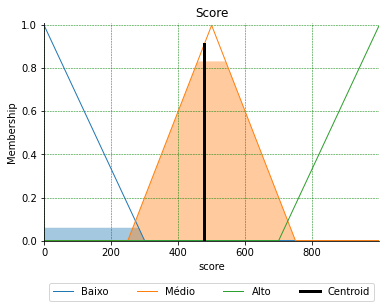

In [13]:
desfuzzificação(sistema, renda = 30, divida = 60, patrimonio = 40)

## Teste 3:

- Renda = 15
- Dívida = 70
- Patrimônio = 25

Score: 375.80


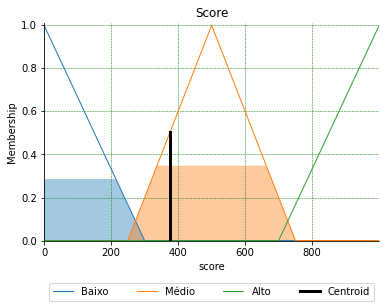

In [14]:
desfuzzificação(sistema, renda = 15, divida = 70, patrimonio = 25)